In [43]:
# https://www.bmc.com/blogs/keras-neural-network-classification/
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
# Loading data
data = pd.read_csv('Group16_ClassificationData.csv', delimiter=',')

<AxesSubplot:>

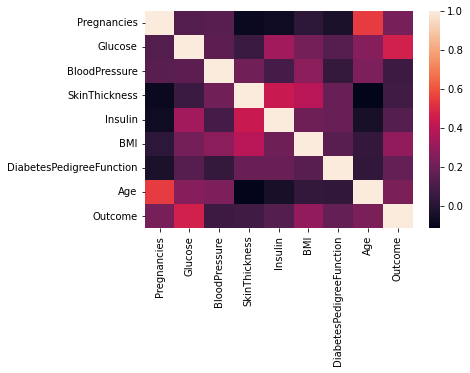

In [44]:
# Check Correlation between varibales using heat map
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [45]:
# Prepare the test and training data sets
from sklearn.model_selection import train_test_split
y = data.Outcome
X = data.drop(["Outcome"], axis=1) 
X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 20% of data for test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [46]:
# Normalizing values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [47]:
# Activation function
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,))) # It’s (8,) since it’s a vector of 8 features. In other words its 8 x 1.
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
# Binary crosscentropy since because out output is 1 or 0
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
614/614 [==============================] - 1s 1ms/step - loss: 0.6344 - accuracy: 0.6775
Epoch 2/20
614/614 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7410
Epoch 3/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4901 - accuracy: 0.7704
Epoch 4/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4788 - accuracy: 0.7590
Epoch 5/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4752 - accuracy: 0.7606
Epoch 6/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4657 - accuracy: 0.7687
Epoch 7/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4644 - accuracy: 0.7704
Epoch 8/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.7720
Epoch 9/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.7720
Epoch 10/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4524 - accuracy: 0.7671

In [49]:
# Printing the weights for each layer
# for layer in model.layers:
#     weights = layer.get_weights()
# print(weights)

In [50]:
from sklearn import metrics
# Now run predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print score/accuracy
train_accuracy = accuracy_score(y_train.round(), y_pred_train.round())
test_accuracy = metrics.accuracy_score(y_test.round(), y_pred_test.round())
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.7899022801302932
Test Accuracy:  0.7597402597402597


In [51]:
# Print score/accuracy
# score = model.evaluate(X_test, y_test,verbose=1)
# print(score)

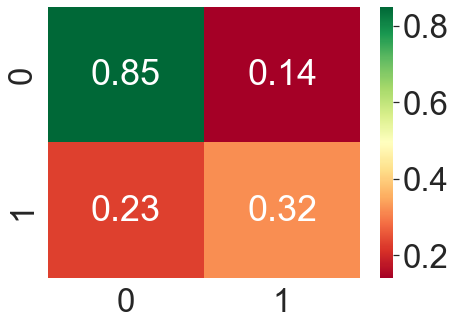

In [52]:
# Print Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (7,5))
sns.set(font_scale=3.0)
dataplot = sns.heatmap(confusion_matrix(y_test, y_pred_test.round())/100,annot=True, fmt='.2f', cmap='RdYlGn')